In [2]:
##Recuperar lista de Atas disponíveis
import requests
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
from datetime import datetime


# URL da API do COPOM para pesquisa de ATAS disponíveis
url = "https://www.bcb.gov.br/api/servico/sitebcb/copom/atas?quantidade=300"

response = requests.get(url)


# Verificando se a requisição foi bem-sucedida
if response.status_code == 200:
    # Expande o resultado recorrente da API
    json_data = response.json()
    data_list = json_data.get('conteudo', [])  
    
    # Converte para DF
    df = pd.DataFrame(data_list)
    numero_atas = len(df)
    df.describe()
    
    

    
   
    #df.to_csv("ultimas_atas_comunicados.csv", index=False)
    #print("\nDados salvos em 'ultimas_atas_comunicados.csv'")
else:
    print(f"Erro na requisição: {response.status_code} - {response.text}")

A listagem de atas apresenta o número da reunião, em a data de referência ( data da efetivação da decisão), a data da publicação da ata e o título. Hoje a lista tem 253 registros, com a primeira reunião em 28 de Janeiro de 1998 e a última em 17 de Setembro de 2025. A primeira publicação ocorreu em 22 de Maio de 1998 e a última em 23 de Setembro de 2025.

In [3]:
df['dataPublicacao'] = pd.to_datetime(df['dataPublicacao'])
df['dataReferencia'] = pd.to_datetime(df['dataReferencia'])
df['prazoPublicacao'] = df['dataPublicacao'] - df['dataReferencia']
df['prazoPublicacao'] = df['prazoPublicacao'].dt.days
df.describe()

,nroReuniao,dataReferencia,dataPublicacao,prazoPublicacao
count,253.000000,253,253,253.000000
mean,147.000000,2010-09-12 02:39:22.055335936,2010-09-25 16:30:21.343873536,13.577075
min,21.000000,1998-01-28 00:00:00,1998-05-22 00:00:00,2.000000
25%,84.000000,2003-05-21 00:00:00,2003-05-28 00:00:00,6.000000
50%,147.000000,2009-12-09 00:00:00,2009-12-17 00:00:00,8.000000
75%,210.000000,2017-10-25 00:00:00,2017-10-31 00:00:00,8.000000
max,273.000000,2025-09-17 00:00:00,2025-09-23 00:00:00,155.000000
std,73.179004,NaN,NaN,24.986484


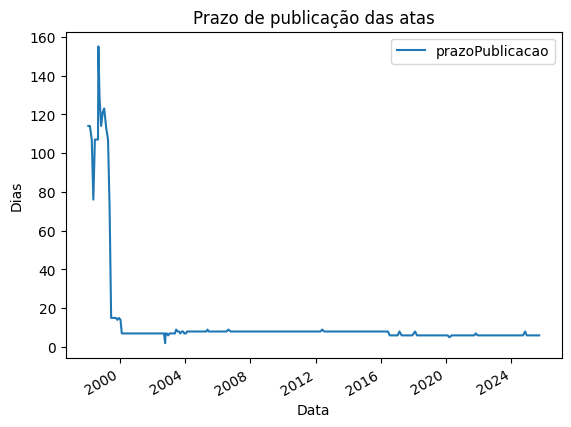

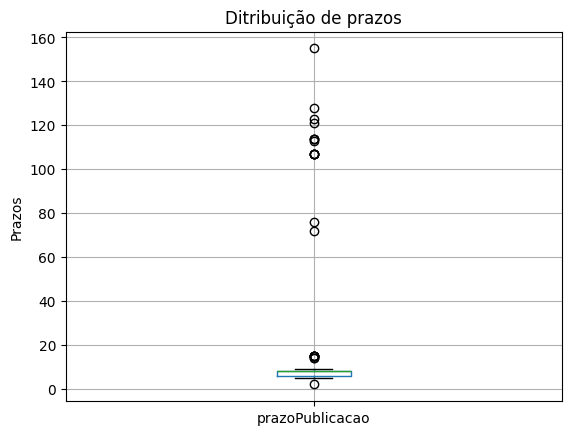

Prazo mínimo:  2
Prazo médio:  13.577075098814229
Prazo mediano:  8.0
Prazo máximo:  155


In [4]:
df.plot(x='dataReferencia', y='prazoPublicacao', kind='line')
plt.title('Prazo de publicação das atas')
plt.xlabel('Data')
plt.ylabel('Dias')
plt.show()
df.boxplot(column='prazoPublicacao')
plt.title('Ditribuição de prazos')
plt.ylabel('Prazos')
plt.show()



print("Prazo mínimo: ", df['prazoPublicacao'].min())
print("Prazo médio: ", df['prazoPublicacao'].mean())
print("Prazo mediano: ", df['prazoPublicacao'].median())
print("Prazo máximo: ", df['prazoPublicacao'].max())

Existe uma mudança clara de comportamento nos prazos publicação das atas. A partir desse resultado foi pesquisada a história do BC e vemos que a rerução de przos coincide com a autonomia do BC e a criação de regime de metas de inflação em Junho de 1999. Para o presente estudo passaremos a utilizar as reuniões posteriores a essa alteração somente.

In [5]:

df1999 = df[df['dataReferencia'] > pd.to_datetime('1999-06-01')]
df1999.describe()



,nroReuniao,dataReferencia,dataPublicacao,prazoPublicacao
count,238.000000,238,238,238.000000
mean,154.500000,2011-06-14 20:10:05.042016768,2011-06-22 06:39:19.663865600,7.436975
min,36.000000,1999-06-23 00:00:00,1999-07-08 00:00:00,2.000000
25%,95.250000,2004-04-22 18:00:00,2004-04-30 18:00:00,6.000000
50%,154.500000,2010-11-13 12:00:00,2010-11-21 12:00:00,8.000000
75%,213.750000,2018-05-02 00:00:00,2018-05-08 00:00:00,8.000000
max,273.000000,2025-09-17 00:00:00,2025-09-23 00:00:00,15.000000
std,68.848868,NaN,NaN,1.672002


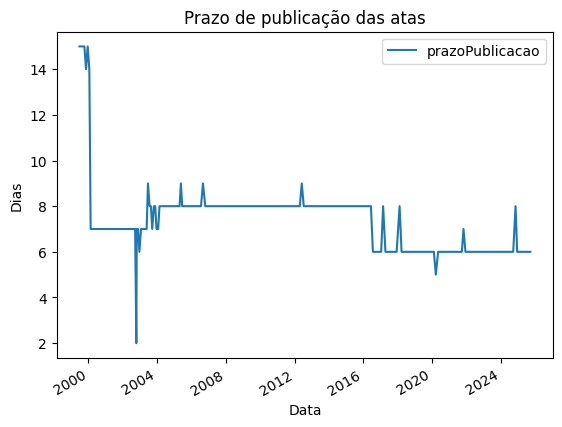

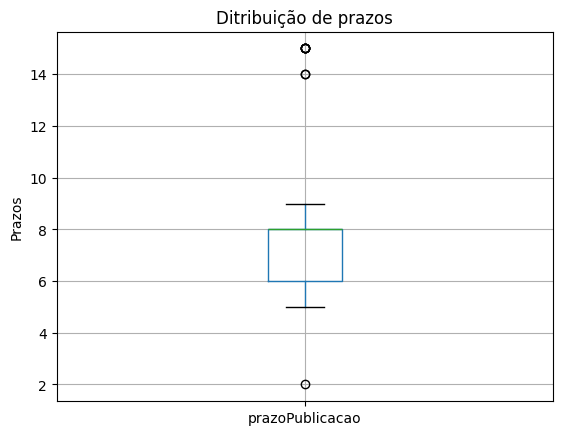

Prazo mínimo:  2
Prazo médio:  7.436974789915967
Prazo mediano:  8.0
Prazo máximo:  15


In [6]:
df1999.plot(x='dataReferencia', y='prazoPublicacao', kind='line')
plt.title('Prazo de publicação das atas')
plt.xlabel('Data')
plt.ylabel('Dias')
plt.show()
df1999.boxplot(column='prazoPublicacao')
plt.title('Ditribuição de prazos')
plt.ylabel('Prazos')
plt.show()



print("Prazo mínimo: ", df1999['prazoPublicacao'].min())
print("Prazo médio: ", df1999['prazoPublicacao'].mean())
print("Prazo mediano: ", df1999['prazoPublicacao'].median())
print("Prazo máximo: ", df1999['prazoPublicacao'].max())

A base filtrada tem 238 registros, com início em Junho de 1999 e tendo todas as atas sujeitas à regulção atual.

In [7]:
#Formando a base de atas e comunicados
# Colunas da ata: nroReuniao dataReferencia dataPublicacao titulo textoAta
    
#Colunas do comunicado: nro_reuniao dataReferencia titulo textoComunicado

colunas_unidas = ['nroReuniao','dataReferencia','dataPublicacao','tituloAta','textoAta','tituloComunicado','textoComunicado']

df_copom = pd.DataFrame(columns=colunas_unidas)
#for i in range(230,200,-1):
for i in range(len(df1999)-1,-1,-1):
    este_nro = df1999.iloc[i]['nroReuniao']


    print("Reuniões a computar: ", i,"  ", end='\r', flush=True)

####Inicio do bloco ata
    #Carrega campos da ata para a reunião
    ata_url = "https://www.bcb.gov.br/api/servico/sitebcb/copom/atas_detalhes?nro_reuniao=" + str(este_nro)
    response = requests.get(ata_url)

    # Verificando se a requisição foi bem-sucedida
    if response.status_code == 200:
        # Expande o resultado recorrente da API
        json_data = response.json()
        ata_data_list = json_data.get('conteudo', [])  
          
        # Converte para DF
        df_ata = pd.DataFrame(ata_data_list)

    else:
        print(f"Erro na requisição: {response.status_code} - {response.text}")
####Fim do bloco ata

####Inicio do bloco comunicado
    com_url = "https://www.bcb.gov.br/api/servico/sitebcb/copom/comunicados_detalhes?nro_reuniao=" + str(este_nro)
    response = requests.get(com_url)
    
    
    # Verificando se a requisição foi bem-sucedida
    if response.status_code == 200:
        # Expande o resultado recorrente da API
        json_data = response.json()
        com_data_list = json_data.get('conteudo', [])  
        
        # Converte para DF
        df_com = pd.DataFrame(com_data_list)

        
    else:
        print(f"Erro na requisição: {response.status_code} - {response.text}")





####Fim do bloco comunicado    

    # Colunas da ata: nroReuniao dataReferencia dataPublicacao titulo textoAta
    
    #Colunas do comunicado: nro_reuniao dataReferencia titulo textoComunicado

    df_linha_copom = pd.DataFrame(columns=colunas_unidas)

    df_linha_copom.at[0,'nroReuniao'] = df_ata.iloc[0]['nroReuniao']
    df_linha_copom.at[0,'dataReferencia'] = df_ata.iloc[0]['dataReferencia']
    df_linha_copom.at[0,'dataPublicacao'] = df_ata.iloc[0]['dataPublicacao']
    df_linha_copom.at[0,'tituloAta'] = df_ata.iloc[0]['titulo']
    df_linha_copom.at[0,'textoAta'] = df_ata.iloc[0]['textoAta']
    if (len(df_com)>0):
        df_linha_copom.at[0,'tituloComunicado'] = df_com.iloc[0]['titulo']
        df_linha_copom.at[0,'textoComunicado'] = df_com.iloc[0]['textoComunicado']


    df_copom = pd.concat([df_copom, df_linha_copom], ignore_index=True)

df_copom.head()    
df_copom.tail()  

,nroReuniao,dataReferencia,dataPublicacao,tituloAta,textoAta,tituloComunicado,textoComunicado
233,269,2025-03-19,2025-03-25,"269ª Reunião - 18-19 março, 2025","<div id=""atacompleta""><div id=""ataconteudo""><h...","Copom eleva a taxa Selic para 14,25% a.a.","<div class=""ExternalClassAE4A4113CD704413AF90A..."
234,270,2025-05-07,2025-05-13,"270ª Reunião - 6-7 maio, 2025","<div id=""atacompleta""><div id=""ataconteudo""><h...","Copom eleva a taxa Selic para 14,75% a.a.","<div class=""ExternalClassB27C33A0668D4D38BE755..."
235,271,2025-06-18,2025-06-24,"271ª Reunião - 17-18 junho, 2025","<div id=""atacompleta""><div id=""ataconteudo""><h...","Copom eleva a taxa Selic para 15,00% a.a.","<div class=""ExternalClass276B5992DAD145FD92ED7..."
236,272,2025-07-30,2025-08-05,"272ª Reunião - 29-30 julho, 2025","<div id=""atacompleta""><div id=""ataconteudo""><h...","Copom mantém a taxa Selic em 15,00% a.a.","<div class=""ExternalClass1BE7096A76144A1BB7BCE..."
237,273,2025-09-17,2025-09-23,"273ª Reunião - 16-17 setembro, 2025","<div id=""atacompleta""><div id=""ataconteudo""><h...","Copom mantém a taxa Selic em 15,00% a.a.","<div class=""ExternalClass89BEC3FC87B24E52A58CC..."


In [8]:
df_copom['tamTextoAta'] = df_copom['textoAta'].str.len()
df_copom['tamTextoComunicado'] = df_copom['textoComunicado'].str.len()
df_copom.head()    

,nroReuniao,dataReferencia,dataPublicacao,tituloAta,textoAta,tituloComunicado,textoComunicado,tamTextoAta,tamTextoComunicado
0,36,1999-06-23,1999-07-08,36ª Reunião,\n\n \n <p><strong>Sum&aacute;rio</strong>...,NaN,NaN,55016.0,NaN
1,37,1999-07-28,1999-08-12,37ª Reunião,\n\n \n <p><strong>Sum&aacute;rio</strong>...,NaN,NaN,21833.0,NaN
2,38,1999-09-01,1999-09-16,38ª Reunião,\n\n \n <p><strong>Sum&aacute;rio</strong>...,NaN,NaN,26462.0,NaN
3,39,1999-09-22,1999-10-07,39ª Reunião (Extraordinária),\n\n \n <p><strong>Sum&aacute;rio</strong>...,NaN,NaN,23271.0,NaN
4,40,1999-10-06,1999-10-21,40ª Reunião,\n\n \n <p><strong>Sum&aacute;rio</strong>...,NaN,NaN,21048.0,NaN


Tamanho mínimo das atas:  9177.0
Tamanho máximo das atas:  85056.0
Tamanho médio das atas:  46994.7572815534
Tamanho mediano das atas:  48215.0


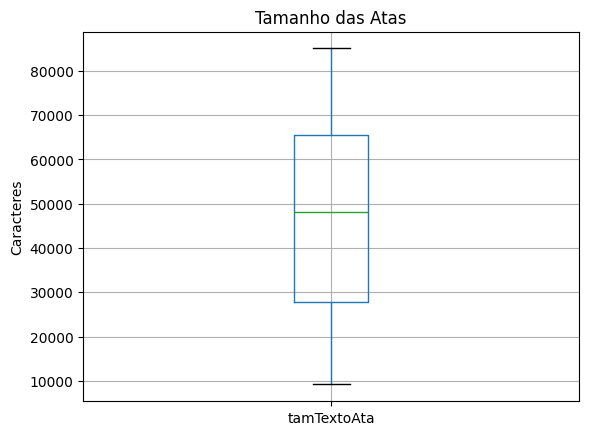

Tamanho mínimo dos comunicados:  99.0
Tamanho máximo dos comunicados:  7254.0
Tamanho médio dos comunicados:  2098.5526315789475
Tamanho mediano dos comunicados:  560.5


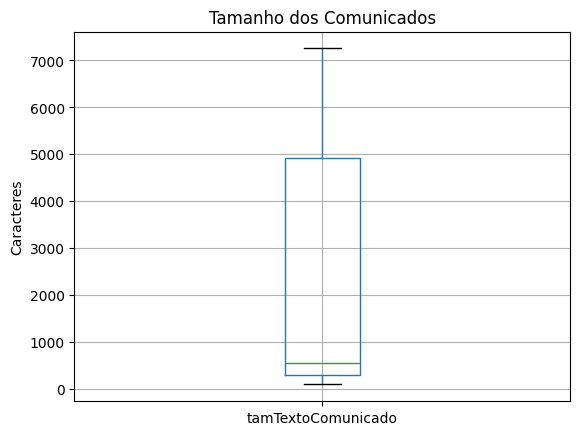

In [9]:
print("Tamanho mínimo das atas: ", df_copom['tamTextoAta'].min())
print("Tamanho máximo das atas: ", df_copom['tamTextoAta'].max())
print("Tamanho médio das atas: ", df_copom['tamTextoAta'].mean())
print("Tamanho mediano das atas: ", df_copom['tamTextoAta'].median())

df_copom.boxplot(column='tamTextoAta')
plt.title('Tamanho das Atas')
plt.ylabel('Caracteres')
plt.show()

print("Tamanho mínimo dos comunicados: ", df_copom['tamTextoComunicado'].min(skipna=True))
print("Tamanho máximo dos comunicados: ", df_copom['tamTextoComunicado'].max(skipna=True))
print("Tamanho médio dos comunicados: ", df_copom['tamTextoComunicado'].mean(skipna=True))
print("Tamanho mediano dos comunicados: ", df_copom['tamTextoComunicado'].median(skipna=True))

df_copom.boxplot(column='tamTextoComunicado')
plt.title('Tamanho dos Comunicados')
plt.ylabel('Caracteres')
plt.show()



O conteúdo das atas e comunicados é texto com formatação HTML. As atas tem em média aproximada de 47.000 caracteres enquanto os comunicados tem en média aproximadamente 6.170 caracteres. Ambos os conteúdos precisam ser tratados para remoção de tags e outros caracteres especiais conforme os requerimentos do modelo selecionado.
Os comunicados começaram a ser publicados a partir da reunião 46, em 26 de abril de 2100. Para reuniões anteriores só exitem atas.

In [10]:
import requests
import pandas as pd
from pandas import json_normalize


###-- DF_IPCA
# URL da API do Séries Temporais BACEN - IPCA
url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.13522/dados?formato=json'

response = requests.get(url)

# Verificando se a requisição foi bem-sucedida
if response.status_code == 200:
    json_data = response.json()
    df_ipca = pd.DataFrame(json_data)
    
    # Converter coluna 'data' para datetime
    df_ipca['data'] = pd.to_datetime(df_ipca['data'], format='%d/%m/%Y')
    df_ipca['valor'] = pd.to_numeric(df_ipca['valor'], errors='coerce')
    
    # Filtrar para datas após 1999-06-01
    df_ipca = df_ipca[df_ipca['data'] > pd.to_datetime('1999-02-01')].reset_index(drop=True)
    
    print("Estatísticas do IPCA filtrado:")
    print(f"Total de registros: {len(df_ipca)}")
    print(f"Período: {df_ipca['data'].min().date()} até {df_ipca['data'].max().date()}")
    print(f"Valor mínimo: {df_ipca['valor'].min():.2f}")
    print(f"Valor máximo: {df_ipca['valor'].max():.2f}")
    print(f"Valor médio: {df_ipca['valor'].mean():.2f}")
    print(f"Valor mediano: {df_ipca['valor'].median():.2f}")
    print(df_ipca.head())
else:
    print(f"Erro na requisição: {response.status_code} - {response.text}")

Estatísticas do IPCA filtrado:
Total de registros: 318
Período: 1999-03-01 até 2025-08-01
Valor mínimo: 1.88
Valor máximo: 17.24
Valor médio: 6.23
Valor mediano: 5.88
        data  valor
0 1999-03-01   3.02
1 1999-04-01   3.35
2 1999-05-01   3.14
3 1999-06-01   3.32
4 1999-07-01   4.57


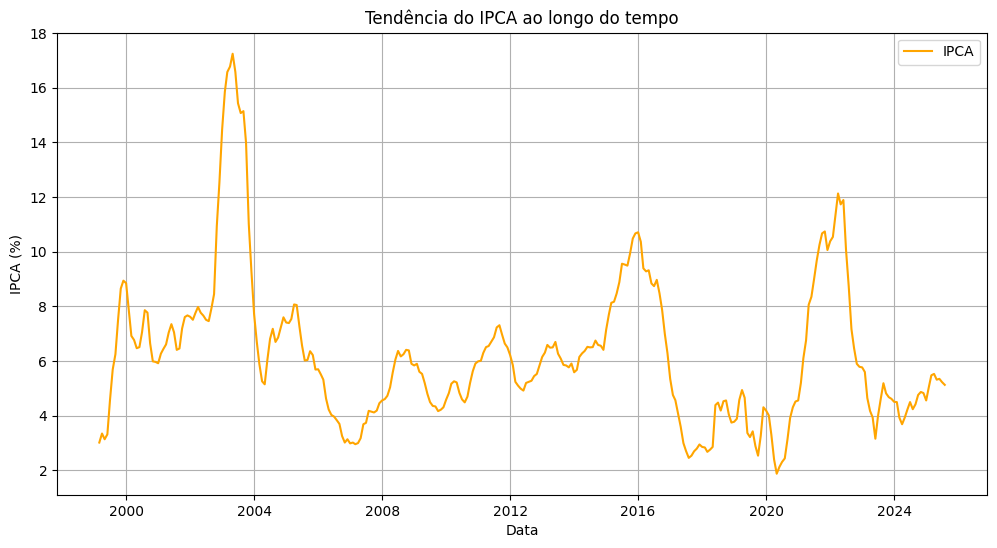

Estatísticas descritivas do IPCA:
count    318.000000
mean       6.228553
std        2.697288
min        1.880000
25%        4.500000
50%        5.875000
75%        7.262500
max       17.240000
Name: valor, dtype: float64


In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df_ipca['data'], df_ipca['valor'], label='IPCA', color='orange')
plt.xlabel('Data')
plt.ylabel('IPCA (%)')
plt.title('Tendência do IPCA ao longo do tempo')
plt.legend()
plt.grid(True)
plt.show()

print("Estatísticas descritivas do IPCA:")
print(df_ipca['valor'].describe())


In [13]:
import requests
import pandas as pd
from pandas import json_normalize
from datetime import datetime


###-- DF_SELIC
# Função para buscar dados SELIC por período
def buscar_selic_periodo(data_inicial, data_final):
    url = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.432/dados?formato=json&dataInicial={data_inicial}&dataFinal={data_final}'
    
    print(f"  URL: {url}")
    response = requests.get(url)
    
    if response.status_code == 200:
        if response.text.strip():
            try:
                json_data = response.json()
                if json_data:
                    print(f"Encontrados {len(json_data)} registros")
                    return pd.DataFrame(json_data)
                else:
                    print(f"API retornou lista vazia para período {data_inicial} a {data_final}")
                    return pd.DataFrame()
            except requests.exceptions.JSONDecodeError as e:
                print(f"Erro ao decodificar JSON: {e}")
                print(f"  Resposta: {response.text[:200]}")
                return pd.DataFrame()
        else:
            print(f"Resposta vazia da API")
            return pd.DataFrame()
    else:
        print(f"Erro HTTP {response.status_code}: {response.text[:200]}")
        return pd.DataFrame()


print("\n=== BUSCANDO PERÍODOS HISTÓRICOS ===")

# Períodos menores para testar se o problema é o tamanho do período
# Encontrar a data mais recente disponível na base de atas
data_mais_recente = df['dataReferencia'].max().strftime('%d/%m/%Y')

periodos = [
    ('01/02/1999', '31/12/2004'), 
    ('01/01/2005', '31/12/2009'),
    ('01/01/2010', '31/12/2014'), 
    ('01/01/2015', '31/12/2019'),
    ('01/01/2020', data_mais_recente)
]

# Lista para armazenar todos os DataFrames
df_selic_list = []

for data_inicial, data_final in periodos:
    print(f"\nBuscando período: {data_inicial} a {data_final}")
    df_periodo = buscar_selic_periodo(data_inicial, data_final)
    
    if not df_periodo.empty:
        df_selic_list.append(df_periodo)
        print(f"Período {data_inicial} a {data_final}: {len(df_periodo)} registros adicionados")
    else:
        print(f"Nenhum dado para o período {data_inicial} a {data_final}")

# Concatenar todos os DataFrames
if df_selic_list:
    df_selic = pd.concat(df_selic_list, ignore_index=True)
    
    # Remover duplicatas baseadas na data
    df_selic = df_selic.drop_duplicates(subset=['data'], keep='first')
    
    # Ordenar por data
    df_selic['data'] = pd.to_datetime(df_selic['data'], format='%d/%m/%Y')
    df_selic = df_selic.sort_values('data').reset_index(drop=True)
    
    print(f"\nRESULTADO FINAL:")
    print(f"Total de registros: {len(df_selic)}")
    print(f"Período coberto: {df_selic['data'].min()} até {df_selic['data'].max()}")
    print(f"Número de períodos consolidados: {len(df_selic_list)}")
    
    print("\nPrimeiros 5 registros:")
    print(df_selic.head())
    print("\nÚltimos 5 registros:")
    print(df_selic.tail())
    
else:
    print("ERRO: Nenhum dado foi carregado de nenhum período")



=== BUSCANDO PERÍODOS HISTÓRICOS ===

Buscando período: 01/02/1999 a 31/12/2004
  URL: https://api.bcb.gov.br/dados/serie/bcdata.sgs.432/dados?formato=json&dataInicial=01/02/1999&dataFinal=31/12/2004
Encontrados 2129 registros
Período 01/02/1999 a 31/12/2004: 2129 registros adicionados

Buscando período: 01/01/2005 a 31/12/2009
  URL: https://api.bcb.gov.br/dados/serie/bcdata.sgs.432/dados?formato=json&dataInicial=01/01/2005&dataFinal=31/12/2009
Encontrados 1826 registros
Período 01/01/2005 a 31/12/2009: 1826 registros adicionados

Buscando período: 01/01/2010 a 31/12/2014
  URL: https://api.bcb.gov.br/dados/serie/bcdata.sgs.432/dados?formato=json&dataInicial=01/01/2010&dataFinal=31/12/2014
Encontrados 1826 registros
Período 01/01/2010 a 31/12/2014: 1826 registros adicionados

Buscando período: 01/01/2015 a 31/12/2019
  URL: https://api.bcb.gov.br/dados/serie/bcdata.sgs.432/dados?formato=json&dataInicial=01/01/2015&dataFinal=31/12/2019
Encontrados 1826 registros
Período 01/01/2015 a 3

Devido a Selic ser um indicador diário a API limita a o range de busca de data, para contornar quebramos em blocos para garantir que todos os dados sejam puxados. 

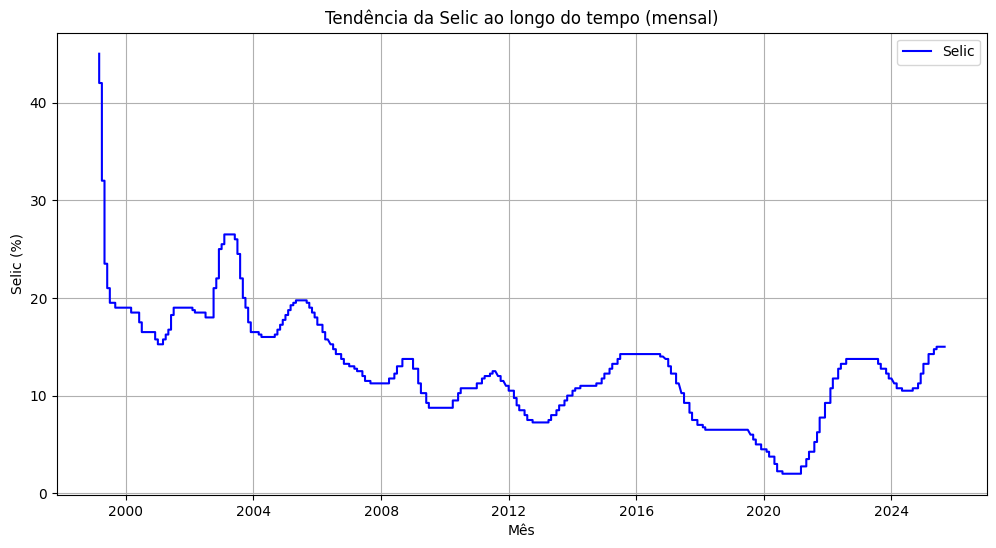

Estatísticas descritivas da Selic:
count    9694.000000
mean       12.727151
std         5.480852
min         2.000000
25%         9.250000
50%        12.250000
75%        16.000000
max        45.000000
Name: valor, dtype: float64


In [16]:
df_selic['valor'] = pd.to_numeric(df_selic['valor'], errors='coerce')
df_selic['mes'] = df_selic['data'].dt.to_period('M').dt.to_timestamp()
plt.figure(figsize=(12, 6))
plt.plot(df_selic['mes'], df_selic['valor'], label='Selic', color='blue')
plt.xlabel('Mês')
plt.ylabel('Selic (%)')
plt.title('Tendência da Selic ao longo do tempo (mensal)')
plt.legend()
plt.grid(True)
plt.show()

print("Estatísticas descritivas da Selic:")
print(df_selic['valor'].describe())

Criando DataFrame de atas...
Limpando HTML das atas...
Estatísticas do DataFrame de atas:
Total de atas: 238
Período: 1999-06-23 00:00:00 até 2025-09-17 00:00:00

Tamanho médio original: 46995 caracteres
Tamanho médio limpo: 31747 caracteres
Redução média: 22.0%
Tamanho mínimo das atas limpas: 9177 caracteres
Tamanho máximo das atas limpas: 85056 caracteres
Tamanho mediano das atas limpas: 48215 caracteres

=== EXEMPLO DE LIMPEZA ===
Texto original (primeiros 200 chars):


  
    <p><strong>Sum&aacute;rio</strong></p>

    <div>
      <a href="#_Toc455996804" title="Pre&ccedil;os e N&iacute;vel de Atividade">Pre&ccedil;os e N&iacute;vel de Atividade</a> 

      <div>


Texto limpo (primeiros 200 chars):
Sumário Preços e Nível de Atividade Agregados Monetários e Crédito Finanças Públicas Balanço de Pagamentos Ambiente Externo Evolução do Mercado de Câmbio Doméstico e Posição das Reservas Internacionai

DataFrame df_atas criado com 238 registros

Primeiros registros:
  dataReferencia    

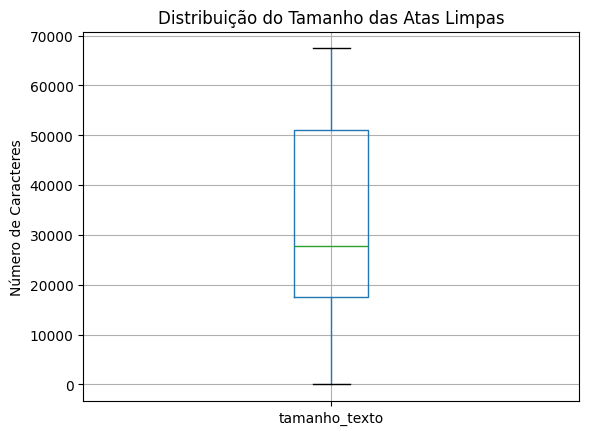

In [40]:
import re
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Função para limpar HTML
def limpar_html(texto_html):
    """
    Remove tags HTML e limpa o texto das atas
    """
    if pd.isna(texto_html) or texto_html == '':
        return ''
    
    # Usar BeautifulSoup para remover tags HTML
    soup = BeautifulSoup(texto_html, 'html.parser')
    
    # Extrair apenas o texto
    texto_limpo = soup.get_text()
    
    # Limpar espaços extras, quebras de linha e caracteres especiais
    texto_limpo = re.sub(r'\s+', ' ', texto_limpo)  # Múltiplos espaços -> um espaço
    texto_limpo = re.sub(r'\n+', ' ', texto_limpo)  # Quebras de linha -> espaço
    texto_limpo = re.sub(r'\t+', ' ', texto_limpo)  # Tabs -> espaço
    texto_limpo = texto_limpo.strip()  # Remove espaços no início e fim
    
    # Remover caracteres especiais desnecessários
    texto_limpo = re.sub(r'[^\w\s\.,;:!?\-()%]', '', texto_limpo)
    
    return texto_limpo

# Criar DataFrame de atas a partir do df_copom
print("Criando DataFrame de atas...")

# Selecionar apenas as colunas necessárias
df_atas = df_copom[['dataReferencia', 'textoAta']].copy()

# Converter dataReferencia para datetime se ainda não estiver
df_atas['dataReferencia'] = pd.to_datetime(df_atas['dataReferencia'])

# Aplicar limpeza HTML na coluna textoAta
print("Limpando HTML das atas...")
df_atas['textoAta_limpo'] = df_atas['textoAta'].apply(limpar_html)

# Verificar se a limpeza funcionou
print("Estatísticas do DataFrame de atas:")
print(f"Total de atas: {len(df_atas)}")
print(f"Período: {df_atas['dataReferencia'].min()} até {df_atas['dataReferencia'].max()}")

# Comparar tamanhos antes e depois da limpeza
df_atas['tamanho_original'] = df_atas['textoAta'].str.len()
df_atas['tamanho_limpo'] = df_atas['textoAta_limpo'].str.len()

print(f"\nTamanho médio original: {df_atas['tamanho_original'].mean():.0f} caracteres")
print(f"Tamanho médio limpo: {df_atas['tamanho_limpo'].mean():.0f} caracteres")
print(f"Redução média: {((df_atas['tamanho_original'] - df_atas['tamanho_limpo']) / df_atas['tamanho_original'] * 100).mean():.1f}%")
print("Tamanho mínimo das atas limpas: {:.0f} caracteres".format(df_atas['textoAta'].str.len().min()))
print("Tamanho máximo das atas limpas: {:.0f} caracteres".format(df_atas['textoAta'].str.len().max()))
print("Tamanho mediano das atas limpas: {:.0f} caracteres".format(df_atas['textoAta'].str.len().median()))

# Mostrar exemplo de uma ata antes e depois da limpeza
print("\n=== EXEMPLO DE LIMPEZA ===")
print("Texto original (primeiros 200 chars):")
print(df_atas['textoAta'].iloc[0][:200])
print("\nTexto limpo (primeiros 200 chars):")
print(df_atas['textoAta_limpo'].iloc[0][:200])

# Remover colunas auxiliares e manter apenas as necessárias
df_atas = df_atas[['dataReferencia', 'textoAta_limpo']].copy()
df_atas.rename(columns={'textoAta_limpo': 'textoAta'}, inplace=True)

print(f"\nDataFrame df_atas criado com {len(df_atas)} registros")
print("\nPrimeiros registros:")
print(df_atas.head())



# Criar uma coluna temporária com o tamanho para o boxplot
df_atas_temp = df_atas.copy()
df_atas_temp['tamanho_texto'] = df_atas_temp['textoAta'].str.len()

# Fazer o boxplot do tamanho do texto
df_atas_temp.boxplot(column='tamanho_texto')
plt.title('Distribuição do Tamanho das Atas Limpas')
plt.ylabel('Número de Caracteres')
plt.show()

# Remover a coluna temporária
del df_atas_temp



In [41]:
###--- CONSOLIDAÇAO FINAL

import pandas as pd
import numpy as np

# Criar DataFrame consolidado
print("=== CRIANDO DATAFRAME CONSOLIDADO ===")

# Preparar dados base das atas
df_final = df_atas[['dataReferencia', 'textoAta']].copy()
df_final.rename(columns={'dataReferencia': 'Data', 'textoAta': 'Texto'}, inplace=True)

# Converter datas para datetime se ainda não estiverem
df_final['Data'] = pd.to_datetime(df_final['Data'])

# Preparar df_selic
if 'df_selic' in locals() and not df_selic.empty:
    df_selic_prep = df_selic.copy()
    df_selic_prep['data'] = pd.to_datetime(df_selic_prep['data'])
    df_selic_prep['valor'] = pd.to_numeric(df_selic_prep['valor'], errors='coerce')
else:
    print("df_selic não está disponível ou está vazio")
    df_selic_prep = pd.DataFrame()

# Preparar df_ipca
if 'df_ipca' in locals() and not df_ipca.empty:
    df_ipca_prep = df_ipca.copy()
    df_ipca_prep['data'] = pd.to_datetime(df_ipca_prep['data'], format='%d/%m/%Y')
    df_ipca_prep['valor'] = pd.to_numeric(df_ipca_prep['valor'], errors='coerce')
    # Ordenar por data para facilitar busca de valor anterior
    df_ipca_prep = df_ipca_prep.sort_values('data').reset_index(drop=True)
else:
    print("df_ipca não está disponível ou está vazio")
    df_ipca_prep = pd.DataFrame()

print(f"Base de atas: {len(df_final)} registros")
print(f"Dados SELIC: {len(df_selic_prep) if not df_selic_prep.empty else 0} registros")
print(f"Dados IPCA: {len(df_ipca_prep) if not df_ipca_prep.empty else 0} registros")

# Função para buscar valor SELIC exato
def buscar_selic(data_ata):
    if df_selic_prep.empty:
        return np.nan
    
    # Buscar valor exato da data
    valor_selic = df_selic_prep[df_selic_prep['data'] == data_ata]['valor']
    
    if not valor_selic.empty:
        return valor_selic.iloc[0]
    else:
        # Se não encontrar valor exato, buscar o mais próximo anterior
        valores_anteriores = df_selic_prep[df_selic_prep['data'] <= data_ata]
        if not valores_anteriores.empty:
            return valores_anteriores.iloc[-1]['valor']
        else:
            return np.nan

# Função para buscar valor IPCA anterior
def buscar_ipca_anterior(data_ata):
    if df_ipca_prep.empty:
        return np.nan
    
    # Buscar valores IPCA anteriores à data da ata
    valores_anteriores = df_ipca_prep[df_ipca_prep['data'] < data_ata]
    
    if not valores_anteriores.empty:
        # Retornar o valor mais recente anterior à data da ata
        return valores_anteriores.iloc[-1]['valor']
    else:
        return np.nan

print("\nBuscando valores SELIC e IPCA para cada ata...")

# Aplicar funções para buscar valores
df_final['Selic'] = df_final['Data'].apply(buscar_selic)
df_final['IPCA'] = df_final['Data'].apply(buscar_ipca_anterior)

# Adicionar coluna Selic (4m) - SELIC daqui a 4 meses após cada ata para futuras validações de simulações.
def buscar_selic_4m(data_ata):
    if df_selic_prep.empty:
        return np.nan
    data_4m = data_ata + pd.DateOffset(months=4)
    valor_selic_4m = df_selic_prep[df_selic_prep['data'] == data_4m]['valor']
    if not valor_selic_4m.empty:
        return valor_selic_4m.iloc[0]
    else:
        # Se não encontrar valor exato, buscar o mais próximo anterior
        valores_anteriores = df_selic_prep[df_selic_prep['data'] <= data_4m]
        if not valores_anteriores.empty:
            return valores_anteriores.iloc[-1]['valor']
        else:
            return np.nan

df_final['Selic (4m)'] = df_final['Data'].apply(buscar_selic_4m)

# Verificar resultados
print("\n=== ESTATÍSTICAS DO DATAFRAME FINAL ===")
print(f"Total de registros: {len(df_final)}")
print(f"Período: {df_final['Data'].min()} até {df_final['Data'].max()}")

print(f"\nSELIC:")
print(f"  Valores válidos: {df_final['Selic'].notna().sum()}/{len(df_final)}")
print(f"  Valores faltantes: {df_final['Selic'].isna().sum()}")
if df_final['Selic'].notna().any():
    print(f"  Min: {df_final['Selic'].min():.2f}%")
    print(f"  Max: {df_final['Selic'].max():.2f}%")
    print(f"  Média: {df_final['Selic'].mean():.2f}%")

print(f"\nIPCA:")
print(f"  Valores válidos: {df_final['IPCA'].notna().sum()}/{len(df_final)}")
print(f"  Valores faltantes: {df_final['IPCA'].isna().sum()}")
if df_final['IPCA'].notna().any():
    print(f"  Min: {df_final['IPCA'].min():.2f}%")
    print(f"  Max: {df_final['IPCA'].max():.2f}%")
    print(f"  Média: {df_final['IPCA'].mean():.2f}%")

print("\n=== PRIMEIROS REGISTROS DO DATAFRAME FINAL ===")
print(df_final.head())

print("\n=== ÚLTIMOS REGISTROS DO DATAFRAME FINAL ===")
print(df_final.tail())

# Verificar registros com dados faltantes
registros_incompletos = df_final[(df_final['Selic'].isna()) | (df_final['IPCA'].isna())]
if not registros_incompletos.empty:
    print(f"\n{len(registros_incompletos)} registros com dados faltantes:")
    print(registros_incompletos[['Data', 'Selic', 'IPCA']])

print(f"\nDataFrame final criado: df_final com {len(df_final)} registros")

=== CRIANDO DATAFRAME CONSOLIDADO ===
Base de atas: 238 registros
Dados SELIC: 9694 registros
Dados IPCA: 318 registros

Buscando valores SELIC e IPCA para cada ata...

=== ESTATÍSTICAS DO DATAFRAME FINAL ===
Total de registros: 238
Período: 1999-06-23 00:00:00 até 2025-09-17 00:00:00

SELIC:
  Valores válidos: 238/238
  Valores faltantes: 0
  Min: 2.00%
  Max: 26.50%
  Média: 13.28%

IPCA:
  Valores válidos: 238/238
  Valores faltantes: 0
  Min: 1.88%
  Max: 17.24%
  Média: 6.49%

=== PRIMEIROS REGISTROS DO DATAFRAME FINAL ===
        Data                                              Texto  Selic  IPCA  \
0 1999-06-23  Sumário Preços e Nível de Atividade Agregados ...   22.0  3.32   
1 1999-07-28  Sumário Preços e nível de atividade Agregados ...   21.0  4.57   
2 1999-09-01  Sumário Demanda e oferta agregadas Preços Agre...   19.5  5.69   
3 1999-09-22  Sumário Demanda e oferta agregadas Ambiente ex...   19.5  6.25   
4 1999-10-06  Sumário Demanda e oferta agregadas Ambiente Ex...   

df_final : Data frame consolidado realizando um merge nos dados do df_atas, df_selic e df_ipca, com as seguintes colunas:

[Data]: Coluna de data de referencia da publicação da ata.
[Texto]: Conteudo da ata.
[Selic]: Taxa selic do dia de referencia da publicação da ata.
[IPCA]: Taxa IPCA da data anterior a publicão da ata.
[Selic (4m)]: Valor da Selic em 4 meses, coluna que será usada para analises e validações posteriores.
